In [20]:
import PIL
print(PIL.__version__)

9.5.0


In [14]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import random
import os
from tqdm import tqdm
import csv
import cv2
from torch.quantization import quantize_dynamic
%matplotlib inline


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/ashutosh/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-3 Python-3.10.0 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
import urllib.request
urllib.request.urlretrieve('https://blog.finxter.com/wp-content/uploads/2022/04/greenland_01a.jpg',"img.jpg")


('img.jpg', <http.client.HTTPMessage at 0x7fc7fb8568f0>)

In [5]:
img = "img.jpg"

In [6]:
results = model(img)
results.print()

image 1/1: 360x640 7 persons, 1 boat
Speed: 8.1ms pre-process, 94.5ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)


In [7]:
!cd yolov5 && python train.py --img 640 --epochs 50 --data /home/ashutosh/work/od/yolov5/data/boards_class.yaml --weights yolov5s.pt --workers 8

train: weights=yolov5s.pt, cfg=, data=/home/ashutosh/work/od/yolov5/data/boards_class.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 19 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-198-g34c2187 Python-3.10.0 torch-2.0.1+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp24/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/ashutosh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-29 Python-3.10.0 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [13]:
torch.save(model.state_dict(), 'saved_models/custom_object_detection_model.pth')

In [16]:
quantized_model = quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)
torch.save(quantized_model.state_dict(), 'saved_models/quantized_custom_object_detection_model.pth')

In [9]:
def get_random_file_paths(directory, num_files):
    file_list = [os.path.join(directory, file) for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]
    if not file_list:
        raise ValueError("No files found in the directory.")

    return random.sample(file_list, num_files)

In [10]:
test_img = "data/images/mix8.jpg"
# test_img = get_random_file_paths("data/images/", 1)

test_img = test_img if type(test_img) == str else test_img[0]

results = model(test_img)
results.print()


image 1/1: 720x1600 1 Arduino Uno, 1 Raspberry Pi
Speed: 14.6ms pre-process, 58.8ms inference, 0.8ms NMS per image at shape (1, 3, 288, 640)


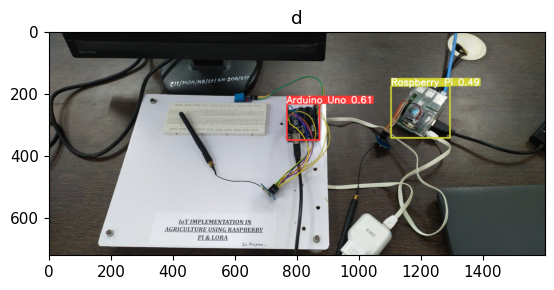

In [11]:
plt.imshow(np.squeeze(results.render()))
plt.title(test_img[0].split("/")[-1])
plt.savefig("det2.jpg", dpi=600)
plt.show()

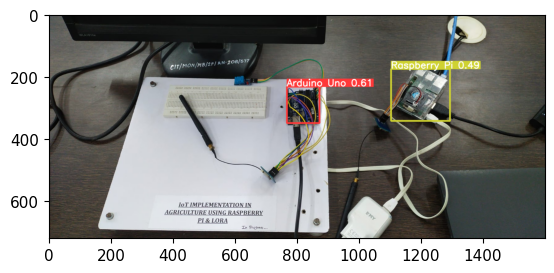

In [12]:

plt.imshow(np.squeeze(results.render()))
plt.show()

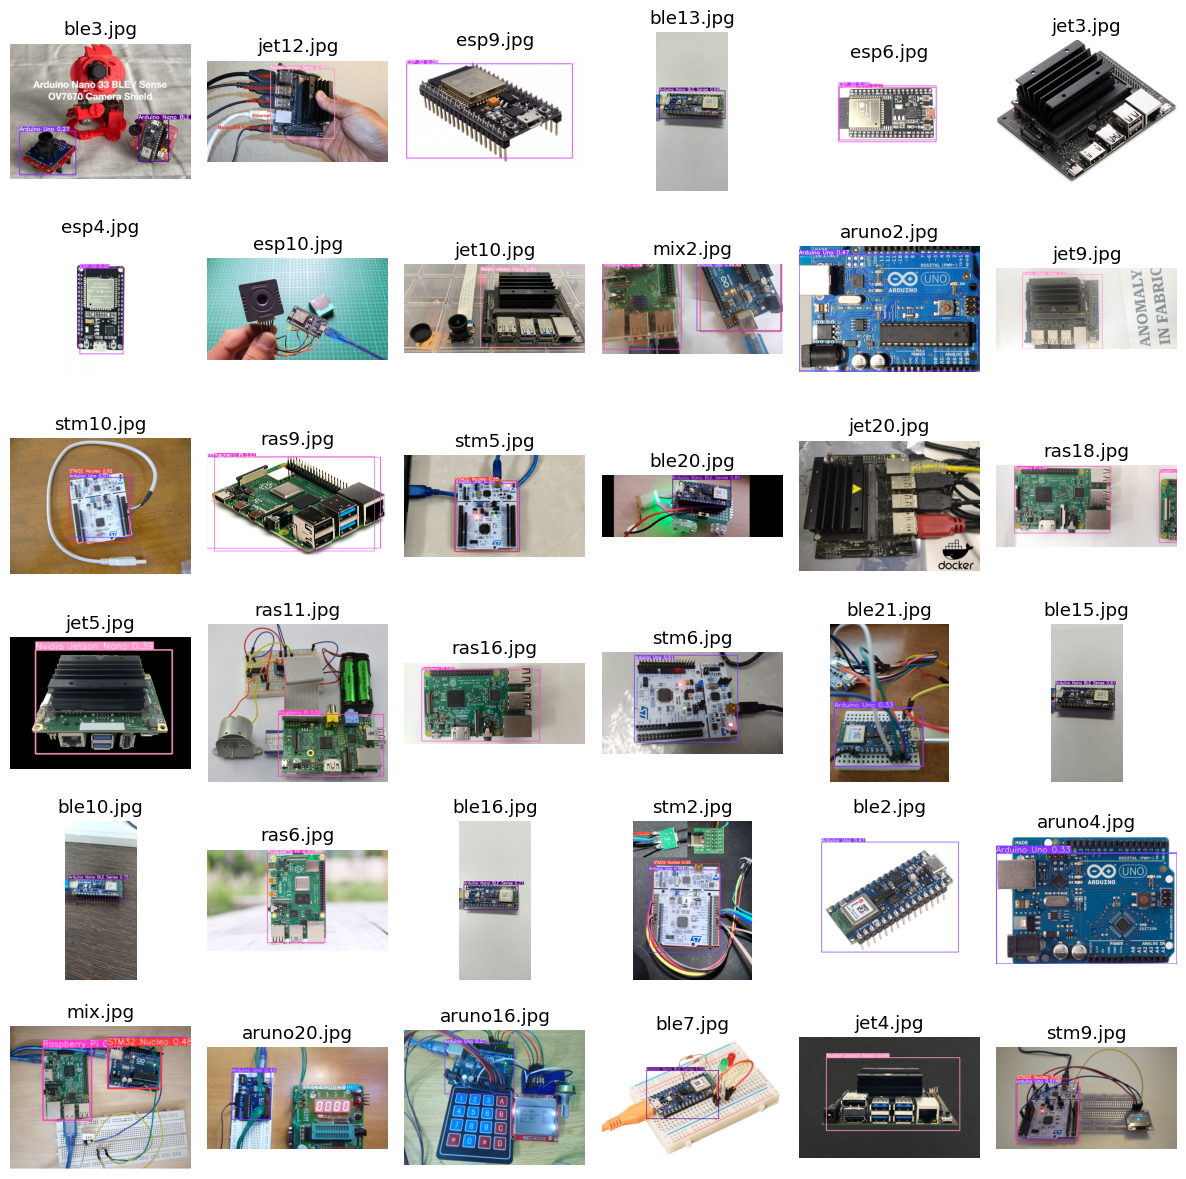

In [14]:
num_images_per_row = 6
num_rows = 6

directory_path = "data/images/"
random_file_paths = get_random_file_paths(directory_path, num_images_per_row * num_rows)

fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(12, 12))

for i, file_path in enumerate(random_file_paths):
    results = model(file_path)
    ax = axes[i // num_images_per_row, i % num_images_per_row]
    ax.imshow(np.squeeze(results.render()))
    ax.set_title(file_path.split("/")[-1])
    ax.axis("off")

plt.tight_layout()
plt.show()

In [14]:
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp24/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/ashutosh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-5 Python-3.10.0 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


image 1/1: 480x640 1 Arduino Uno, 1 Nvidia Jetson Nano
Speed: 5.0ms pre-process, 64.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)


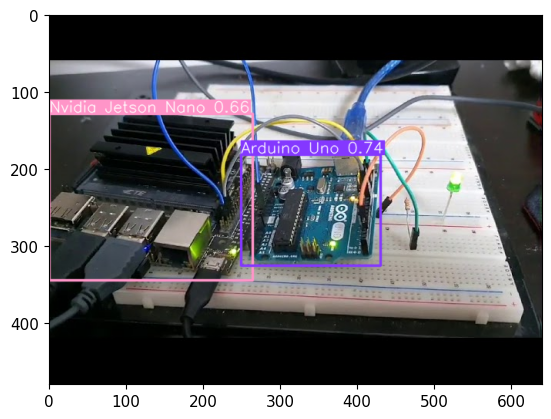

In [176]:
test_img = "data/images/mix6.jpg"
# test_img = get_random_file_paths("data/images/", 1)

test_img = test_img if type(test_img) == str else test_img[0]

results = model2(test_img)
results.print()
plt.imshow(np.squeeze(results.render()))


In [15]:
results.names

{0: 'dog',
 1: 'person',
 2: 'cat',
 3: 'tv',
 4: 'car',
 5: 'meatballs',
 6: 'marinara sauce',
 7: 'tomato soup',
 8: 'chicken noodle soup',
 9: 'french onion soup',
 10: 'chicken breast',
 11: 'ribs',
 12: 'pulled pork',
 13: 'hamburger',
 14: 'cavity',
 15: 'Arduino Uno',
 16: 'Arduino Nano BLE Sense',
 17: 'ESP 32',
 18: 'Nvidia Jetson Nano',
 19: 'Raspberry Pi',
 20: 'STM32 Nucleo'}

In [16]:
highest_confidence_index = results.pred[0][:, -2].argmax().item()
results.names[int(results.pred[0][highest_confidence_index][-1])]



'STM32 Nucleo'

In [17]:
for i in range(1,17):
    print('"data/images/stm'+str(i)+'.jpg", "STM32 Nucleo",')

"data/images/stm1.jpg", "STM32 Nucleo",
"data/images/stm2.jpg", "STM32 Nucleo",
"data/images/stm3.jpg", "STM32 Nucleo",
"data/images/stm4.jpg", "STM32 Nucleo",
"data/images/stm5.jpg", "STM32 Nucleo",
"data/images/stm6.jpg", "STM32 Nucleo",
"data/images/stm7.jpg", "STM32 Nucleo",
"data/images/stm8.jpg", "STM32 Nucleo",
"data/images/stm9.jpg", "STM32 Nucleo",
"data/images/stm10.jpg", "STM32 Nucleo",
"data/images/stm11.jpg", "STM32 Nucleo",
"data/images/stm12.jpg", "STM32 Nucleo",
"data/images/stm13.jpg", "STM32 Nucleo",
"data/images/stm14.jpg", "STM32 Nucleo",
"data/images/stm15.jpg", "STM32 Nucleo",
"data/images/stm16.jpg", "STM32 Nucleo",


In [18]:
image_paths = []
ground_truth_labels = []
with open('test_data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        image_paths.append(row[0].strip())  # Remove leading/trailing spaces
        ground_truth_labels.append(row[1].strip())

In [19]:
print(image_paths)

['data/images/aruno1.jpg', 'data/images/aruno2.jpg', 'data/images/aruno3.jpg', 'data/images/aruno4.jpg', 'data/images/aruno5.jpg', 'data/images/aruno6.jpg', 'data/images/aruno7.jpg', 'data/images/aruno8.jpg', 'data/images/aruno9.jpg', 'data/images/aruno10.jpg', 'data/images/aruno11.jpg', 'data/images/aruno12.jpg', 'data/images/aruno13.jpg', 'data/images/aruno14.jpg', 'data/images/aruno15.jpg', 'data/images/aruno16.jpg', 'data/images/aruno17.jpg', 'data/images/aruno18.jpg', 'data/images/aruno19.jpg', 'data/images/aruno20.jpg', 'data/images/ble1.jpg', 'data/images/ble2.jpg', 'data/images/ble3.jpg', 'data/images/ble4.jpg', 'data/images/ble5.jpg', 'data/images/ble6.jpg', 'data/images/ble7.jpg', 'data/images/ble8.jpg', 'data/images/ble9.jpg', 'data/images/ble10.jpg', 'data/images/ble11.jpg', 'data/images/ble12.jpg', 'data/images/ble13.jpg', 'data/images/ble14.jpg', 'data/images/ble15.jpg', 'data/images/ble16.jpg', 'data/images/ble17.jpg', 'data/images/ble18.jpg', 'data/images/ble19.jpg', 'd

In [20]:
correct_predictions = 0
total_images = len(image_paths)

for image_path, ground_truth_label in tqdm(zip(image_paths, ground_truth_labels)):
    results = model(image_path)

    # Check if any objects were detected
    if len(results.pred[0]) == 0:
        continue

    # Find the index of the highest confidence score
    highest_confidence_index = results.pred[0][:, -2].argmax().item()

    # Get the corresponding class label for the highest confidence prediction
    predicted_label = results.names[int(results.pred[0][highest_confidence_index][-1])]
    # print(predicted_label)
    # print(ground_truth_label)
    # print("-----------------------")
    if predicted_label == ground_truth_label:
        correct_predictions += 1

accuracy = (correct_predictions / total_images) * 100
print(f"Accuracy: {accuracy:.2f}%")

114it [00:04, 23.37it/s]

Accuracy: 78.07%


In [211]:
from sklearn

104

In [228]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@144151.058] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@144151.058] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


In [201]:
import csv

input_file = "test_data.csv"
output_file = "output.csv"

modified_data = []

with open(input_file, "r") as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        path = row[0]
        label = row[1].strip('"') if len(row) > 1 else ""
        modified_data.append((path, label))

with open(output_file, "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter='\t')  # Specify the delimiter as '\t' for tab separation
    writer.writerows(modified_data)



In [10]:
import os
import torch

# Get the model's state dictionary
model_state_dict = model.state_dict()

# Calculate the size of the model in bytes
model_size_bytes = sum(p.numel() * p.element_size() for p in model_state_dict.values())

# Convert to kilobytes (KB) and megabytes (MB)
model_size_kb = model_size_bytes / 1024
model_size_mb = model_size_kb / 1024

print(f"Model size: {model_size_bytes} bytes ({model_size_kb:.2f} KB or {model_size_mb:.2f} MB)")


Model size: 28105300 bytes (27446.58 KB or 26.80 MB)


In [11]:
import torch
from torch.quantization import quantize_dynamic

# Quantize the model (PTQ for both weights and activations)
quantized_model = quantize_dynamic(model, dtype=torch.qint8)

# Assuming you have a quantized model named 'quantized_model'
torch.save(quantized_model.state_dict(), 'quantized_yolov5s.pth')
